In [1]:
# Works best with jupyter-notebook

In [2]:
%matplotlib notebook 
#%matplotlib widget 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import math
from spatialmath import *
from spatialmath.base import *
from collections import namedtuple
from roboticstoolbox import *
import roboticstoolbox.tools.trajectory as tr
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

# Lecture 4.4

Multidimensional smooth trajectories

In [5]:
#Set a first point of (10, 20) and a last point of (30, 10):
first=np.array([10,20])
last=np.array([30,10])
print(first, last)

[10 20] [30 10]


Compute a trajectory using the toolbox function jtraj(), 
accepting arguments of the first point, the last point and the number of timesteps:

tg = jtraj(q0, qf, M): is a joint space trajectory where the joint
coordinates vary from ``q0`` (N) to ``qf`` (N).  

A quintic (5th order) polynomial is used with default zero boundary conditions for velocity and acceleration.

In [7]:
timesteps = 50
out = tr.jtraj(first, last, timesteps)

In [24]:
t   = out.t   # time coordinate
print(out.t.shape) # pos, vel, acc
# print(t[1::5,1])

x   = out.q   # trajectory
print(x.shape)
print(x[1,:])
print(x[25,:])
print(x[-1,:])

xd  = out.qd  # velocity
xdd = out.qdd # acceleration

(50, 6)
(50, 2)
[      10       20]
[   20.38    14.81]
[      30       10]


<IPython.core.display.Javascript object>


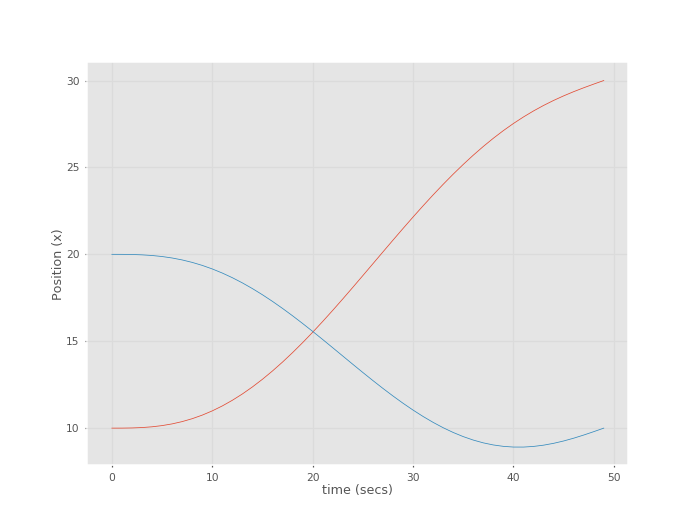

In [70]:
#plot trajectory 
fig1=plt.figure(1);
plt.xlabel('time (secs)');
plt.ylabel('Position (x)');
plt.plot(x);

Plot the velocity graph for the two joints over time

<IPython.core.display.Javascript object>


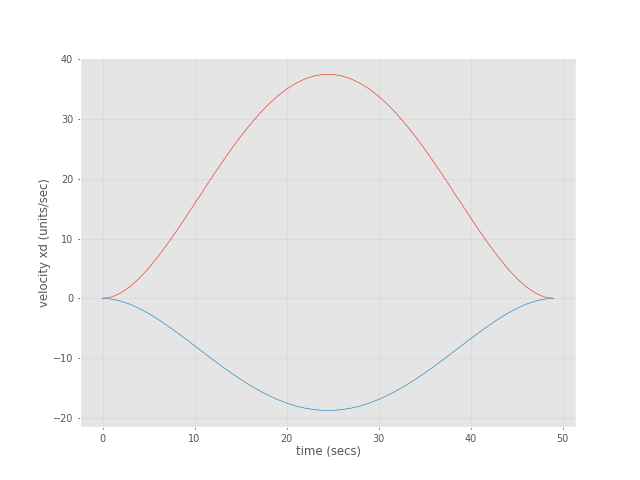

In [26]:
#plot velocity
fig2=plt.figure(2)
plt.xlabel('time (secs)');
plt.ylabel('velocity xd (units/sec)');
plt.plot(xd);

You may also desire to specify initial and final velocities to each axis.

In [42]:
#An initial and final velocity can also be specified by supplying additional input arguments. 
#In this case we will ask for the initial velocity to be 0 units/second 
#and the final velocity to be 10 units/second in each axis:
first = np.array([10,20])
last  = np.array([30,10])
qd0   = [0,0]
qdf   = [10,10]

out = tr.jtraj(first, last, timesteps, qd0, qdf)


ValueError: operands could not be broadcast together with shapes (2,) (14,) 

In [43]:
t   = out.t     # time coordinate
x   = out.q     # trajectory
xd  = out.qd    # velocity
xdd = out.qdd   # acceleration

## 2D Example with Via-Points

A 2D trajectory with via points can also be computed. But to do this, we will need indendent vectors with blends. 

We can use mstraj as before. 

Set a first point of (40, 50) and via points at (60, 30), (40, 10), (20, 30) and returning back to the start position. It makes a diamond, starting at the top vertex and then moving clock-wise.

In [58]:
start=np.array([40,50])
via=np.array([
    [40,50],
    [60,30],
    [40,10],
    [20,30],
    [40,50]
    ])
print("Starting point at top of the diamond is: ", start)
print("Then move clock-wise around the diamond: \n", via)

Starting point at top of the diamond is:  [40 50]
Then move clock-wise around the diamond: 
 [[40 50]
 [60 30]
 [40 10]
 [20 30]
 [40 50]]


---
Compute the trajectory using the toolbox function **mstraj()**.
Provide:
- **multi-dimensional via points**

- a velocity of 2 units/second, 
- null segment velocities, 
- the start position, 
- the time step of 0.1 seconds 
- the acceleration time of 1 second:

In [62]:
dt   = 0.1
tacc = 1
qdmax= 2

out=tr.mstraj(via, dt, tacc, qdmax, q0=start)

0.6 0.3 [      40       50]
0.7 0.35 [      40       50]
0.7999999999999999 0.39999999999999997 [      40       50]
0.8999999999999999 0.44999999999999996 [      40       50]
0.9999999999999999 0.49999999999999994 [      40       50]
1.0999999999999999 0.5499999999999999 [      40       50]
1.2 0.6 [      40       50]
1.3 0.65 [      40       50]
1.4000000000000001 0.7000000000000001 [      40       50]
0.6 0.05454545454545454 [   41.09    48.91]
0.7 0.06363636363636363 [   41.27    48.73]
0.7999999999999999 0.07272727272727272 [   41.45    48.55]
0.8999999999999999 0.0818181818181818 [   41.64    48.36]
0.9999999999999999 0.0909090909090909 [   41.82    48.18]
1.0999999999999999 0.09999999999999999 [      42       48]
1.2 0.10909090909090909 [   42.18    47.82]
1.3 0.11818181818181818 [   42.36    47.64]
1.4000000000000001 0.1272727272727273 [   42.55    47.45]
1.5000000000000002 0.13636363636363638 [   42.73    47.27]
1.6000000000000003 0.14545454545454548 [   42.91    47.09]
1.70000

4.799999999999999 0.4363636363636363 [   31.27    18.73]
4.899999999999999 0.4454545454545453 [   31.09    18.91]
4.999999999999998 0.45454545454545436 [   30.91    19.09]
5.099999999999998 0.46363636363636346 [   30.73    19.27]
5.1999999999999975 0.4727272727272725 [   30.55    19.45]
5.299999999999997 0.48181818181818153 [   30.36    19.64]
5.399999999999997 0.49090909090909063 [   30.18    19.82]
5.4999999999999964 0.49999999999999967 [      30       20]
5.599999999999996 0.5090909090909087 [   29.82    20.18]
5.699999999999996 0.5181818181818177 [   29.64    20.36]
5.799999999999995 0.5272727272727269 [   29.45    20.55]
5.899999999999995 0.5363636363636359 [   29.27    20.73]
5.999999999999995 0.545454545454545 [   29.09    20.91]
6.099999999999994 0.554545454545454 [   28.91    21.09]
6.199999999999994 0.563636363636363 [   28.73    21.27]
6.299999999999994 0.5727272727272722 [   28.55    21.45]
6.399999999999993 0.5818181818181812 [   28.36    21.64]
6.499999999999993 0.5909090

In [63]:
print("The trajectory lasts a total of ", out.t[-1], " secs.")

print("The segments times are as follows \n", out.arrive)
 
print("My via points are: \n", out.via.squeeze())

#print("Print out every nth point of the trajectory \n", out.q[0::10])
#out.info # Useful with more axis

The trajectory lasts a total of  45.800000000000004  secs.
The segments times are as follows 
 [       2     12.9     23.9     34.9     45.9]
My via points are: 
 [[40 50]
 [60 30]
 [40 10]
 [20 30]
 [40 50]]


Plot the figure of the joint angles for each joint. 

<IPython.core.display.Javascript object>


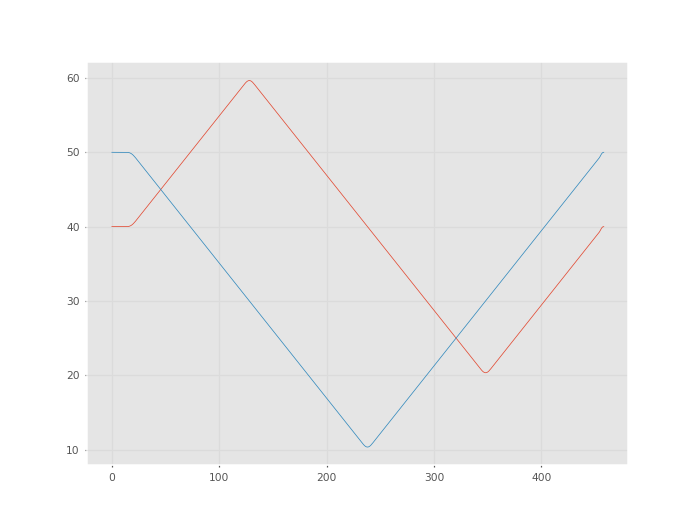

In [60]:
# Plot
fig4=plt.figure(4)
plt.plot(out.q);

There is another interesting way to plot this graph. 

Plotting the first coordinate versus the second coordinate shows the motion of the point on the xy-plane:

<IPython.core.display.Javascript object>


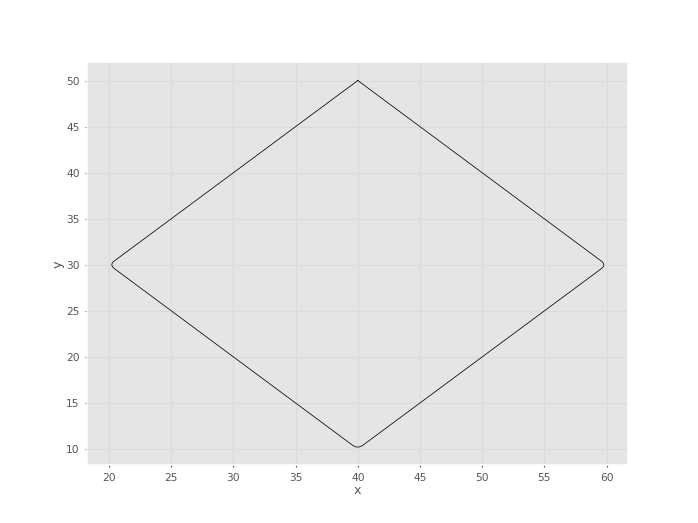

In [69]:
fig5=plt.figure(5)
plt.plot(out.q[:,0], out.q[:,1], color='black');
plt.xlabel('x');
plt.ylabel('y');

## What if we want each axis to move at a different velocity?

The velocity of each axis can be specified separately by passing a velocity vector qdmax. 

In this case a velocity of 1 unit/second in the x-axis and 3 units/second in the y-axis:

In [66]:
dt   = 0.1
tacc = 1.0
qdmax = [1,3]

out=tr.mstraj(via, dt, tacc, qdmax, q0=start)

0.6 0.3 [      40       50]
0.7 0.35 [      40       50]
0.7999999999999999 0.39999999999999997 [      40       50]
0.8999999999999999 0.44999999999999996 [      40       50]
0.9999999999999999 0.49999999999999994 [      40       50]
1.0999999999999999 0.5499999999999999 [      40       50]
1.2 0.6 [      40       50]
1.3 0.65 [      40       50]
1.4000000000000001 0.7000000000000001 [      40       50]
0.6 0.02857142857142857 [   40.57    49.43]
0.7 0.03333333333333333 [   40.67    49.33]
0.7999999999999999 0.03809523809523809 [   40.76    49.24]
0.8999999999999999 0.04285714285714285 [   40.86    49.14]
0.9999999999999999 0.047619047619047616 [   40.95    49.05]
1.0999999999999999 0.052380952380952375 [   41.05    48.95]
1.2 0.05714285714285714 [   41.14    48.86]
1.3 0.06190476190476191 [   41.24    48.76]
1.4000000000000001 0.06666666666666668 [   41.33    48.67]
1.5000000000000002 0.07142857142857144 [   41.43    48.57]
1.6000000000000003 0.07619047619047621 [   41.52    48.48]
1.

15.099999999999962 0.7190476190476173 [   25.62    24.38]
15.199999999999962 0.723809523809522 [   25.52    24.48]
15.299999999999962 0.7285714285714268 [   25.43    24.57]
15.399999999999961 0.7333333333333315 [   25.33    24.67]
15.499999999999961 0.7380952380952363 [   25.24    24.76]
15.59999999999996 0.742857142857141 [   25.14    24.86]
15.69999999999996 0.7476190476190457 [   25.05    24.95]
15.79999999999996 0.7523809523809505 [   24.95    25.05]
15.89999999999996 0.7571428571428552 [   24.86    25.14]
15.99999999999996 0.76190476190476 [   24.76    25.24]
16.09999999999996 0.7666666666666647 [   24.67    25.33]
16.19999999999996 0.7714285714285696 [   24.57    25.43]
16.29999999999996 0.7761904761904743 [   24.48    25.52]
16.399999999999963 0.7809523809523792 [   24.38    25.62]
16.499999999999964 0.785714285714284 [   24.29    25.71]
16.599999999999966 0.7904761904761889 [   24.19    25.81]
16.699999999999967 0.7952380952380936 [    24.1     25.9]
16.79999999999997 0.7999999

<IPython.core.display.Javascript object>


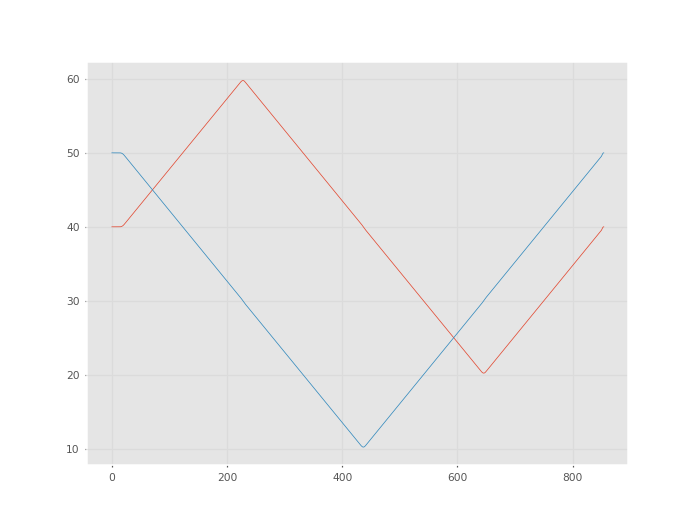

In [67]:
# plot with independent velocity profile
fig6=plt.figure(6)
plt.plot(out.q);

What do you notice about the duration of the above graph? 

What is the ration of qdmax before to the slower axis now?

---
We can again plot the 1st vs 2nd coordinate to show the xy motion:


<IPython.core.display.Javascript object>


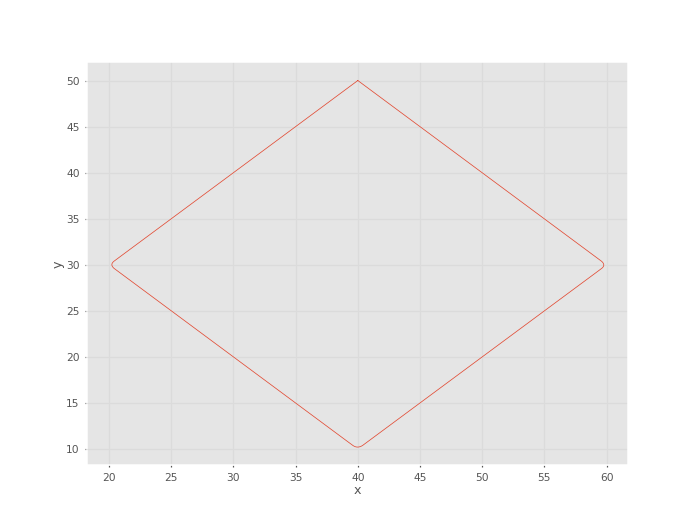

In [72]:
fig7=plt.figure(7)
plt.plot(out.q[:,0], out.q[:,1]);
plt.xlabel('x');
plt.ylabel('y');